# Data Objective
 Analyse past and current trends within the entertainment industry to describe the popularity of current entertainment media, and both describe and predict growing areas of entertainment for future investment for the organisation.

### Imports and Creating Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

books_df = pd.read_csv('books.csv', on_bad_lines='skip')
hotstar_df = pd.read_csv('hotstar.csv')
netflix_df = pd.read_csv('netflix_titles.csv')
reviews_df = pd.read_csv('reviews.csv')
games_df = pd.read_csv('Video_Games.csv')

# Understanding the Books Dataset

In [2]:
books_df.info()
books_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


The data shown is for the books dataset is generally of good quality. The data consists of 12 columns and 11123 rows. The "publication_date" is not in the correct format so this will need to be changed.

# Cleaning the Books Dataset

In [3]:
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors='coerce') # Changes the format of the publication_date column to datetime
books_df['publication_date'] = books_df['publication_date'].dt.date

books_df.dropna(subset=['bookID', 'title', 'authors', 'isbn', 'publication_date'], inplace=True) # Removes any rows where these columns are empty
books_df.drop_duplicates(inplace=True) # Drops any duplicate rows

This code will clean the books dataset, making it more usable. The cleaning for this dataset consists of changing the date format to the correct format. This also removes any important rows where data is missing, along with any duplicates.

# Enhancing the Books Dataset

In [4]:
# Calculate the first quartile (Q1)
Q1 = books_df[["average_rating", "ratings_count"]].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = books_df[["average_rating", "ratings_count"]].quantile(0.75)
# Calculate the interquartile range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1
# Calculate the cutoff value by multiplying the IQR by 1.5
cutoff = 1.5 * IQR
# Calculate the lower and upper bounds for outliers
lower, upper = Q1 - cutoff, Q3 + cutoff
# Filter out the outliers directly without creating an intermediate column
# Keep rows within the acceptable range (i.e., not outliers)
books_df = books_df[
    (books_df["average_rating"] >= lower["average_rating"]) & (books_df["average_rating"] <= upper["average_rating"]) &
    (books_df["ratings_count"] >= lower["ratings_count"]) & (books_df["ratings_count"] <= upper["ratings_count"])
]

This code will calculate the first and third quartile ranges of the code and create the lower and upper bounds. This will be used to remove any outliers from the datase, making it easier to use and more accurate.

This section will not be needed on all the datasets as it depends on what the data is being used for.

# Analysing and Visualising the Books Dataset

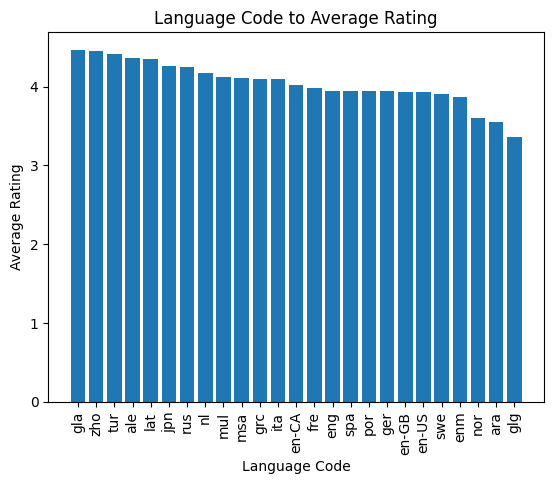

In [5]:
df = books_df.groupby('language_code')['average_rating'].mean().reset_index() # Groups the data and calculates the mean
df = df.sort_values('average_rating', ascending=False) # Sorts the chart from highest to lowest

plt.xticks(rotation = 90) # rotates the langauge codes by 90 degrees to make them more readable
plt.bar(df['language_code'], df['average_rating'])
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.title('Language Code to Average Rating')
plt.show()

This shows the book language code compared to the average rating for that language code. This data shows that all language codes had average ratings in between 3 and 5. It also shows GLA had the highest average rating out of any language code whilst GLG had the lowest.

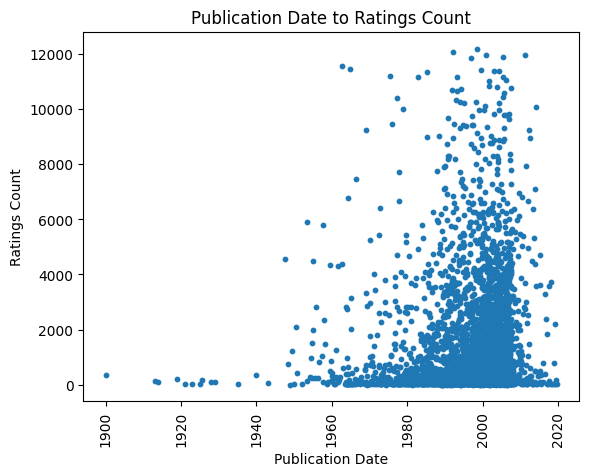

In [6]:
df = books_df.groupby('publication_date')['ratings_count'].mean().reset_index() # Groups the data and calculates the mean

plt.xticks(rotation = 90)
plt.scatter(df['publication_date'], df['ratings_count'], s=10)
plt.xlabel('Publication Date')
plt.ylabel('Ratings Count')
plt.title('Publication Date to Ratings Count')
plt.show()

This shows the numberof ratings for each year on a scatter graph. This shows that there were more ratings on average in the early 2000s and they have since sharply delined.

# Understanding the Hotstar Dataset

In [7]:
hotstar_df.info()
print(hotstar_df['type'].unique())
hotstar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6874 non-null   int64  
 1   title         6874 non-null   object 
 2   description   6874 non-null   object 
 3   genre         6874 non-null   object 
 4   year          6874 non-null   int64  
 5   age_rating    6874 non-null   object 
 6   running_time  4568 non-null   float64
 7   seasons       2306 non-null   float64
 8   episodes      2306 non-null   float64
 9   type          6874 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 537.2+ KB
['movie' 'tv']


,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


This dataset consists of 10 columns and 6874 rows with each column appearing to have a suitable data type. The "running_time", "seasons", and "episodes" columns all rely on the "type" column for their values, so they may be left empty.

# Cleaning the Hotstar Dataset

In [8]:
hotstar_df.dropna(subset=['hotstar_id', 'title', 'genre', 'type', 'year'], inplace=True) # Removes any rows where these columns are empty
hotstar_df.drop_duplicates(inplace=True) # Drops any duplicate rows

This code will remove any duplicated rows along with any rows that contain missing or invalid values in the important columns.

# Analysing and Visualising the Hotstar Dataset

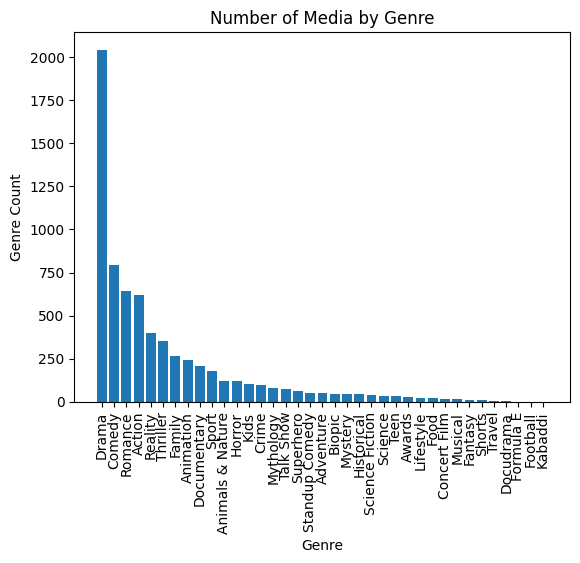

In [9]:
genre_count = hotstar_df['genre'].value_counts() # Counts the number of genres
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.title('Number of Media by Genre')
plt.show()

This shows the amount of movies there are for each genre. This shows that drama is by far the genre most popular to produce, whilst talk shows are the least commonly produced.

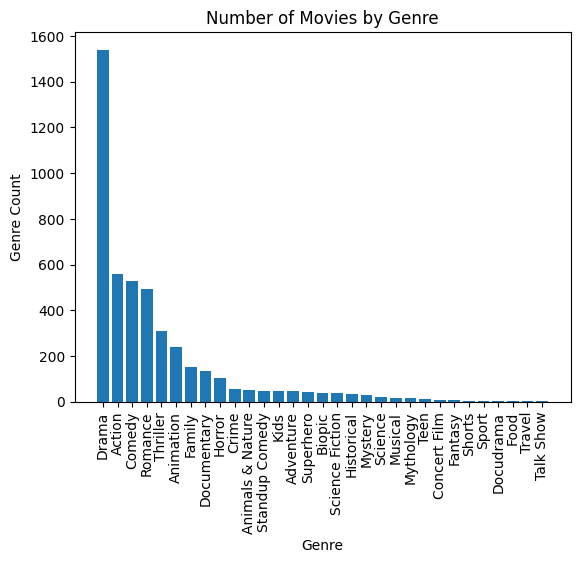

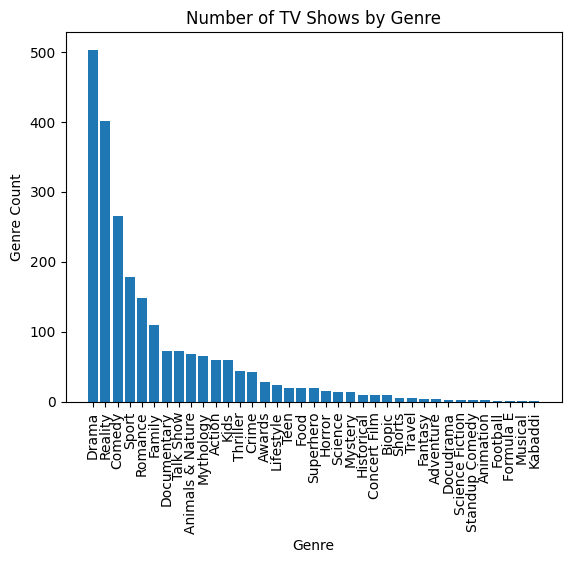

In [10]:
# Gets number of genres for only movies
genre_count = hotstar_df[hotstar_df['type'] == 'movie']['genre'].value_counts()
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.title('Number of Movies by Genre')
plt.show()


# Gets number of genres for only TV shows
genre_count = hotstar_df[hotstar_df['type'] == 'tv']['genre'].value_counts()
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Count')
plt.title('Number of TV Shows by Genre')
plt.show()

These graphs go more in depth and seperate the previous graph up into the types of media. While drama is still the most popular on both graphs, action is much more common with movies, being the second most common whereas it is the 11th most common in TV shows. Talk shows also go from least common in movies to 8th most common in TV shows.

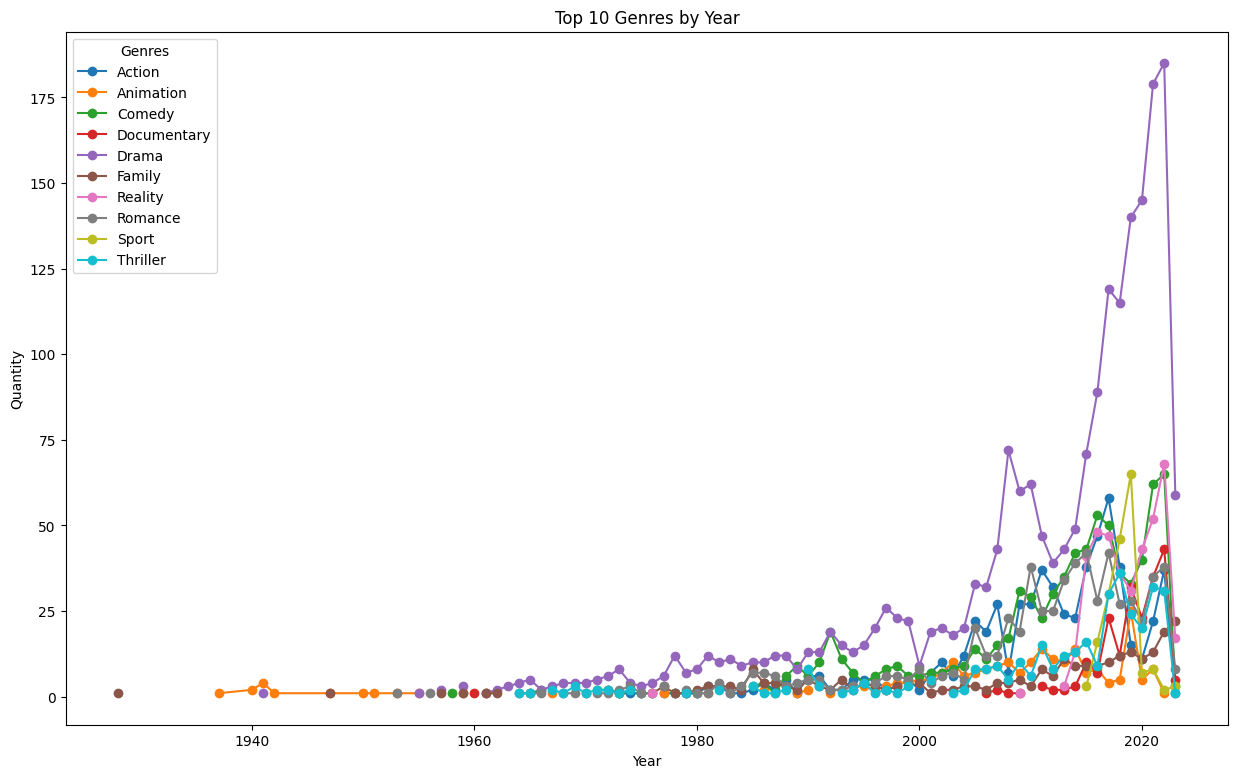

In [11]:
top_genres = hotstar_df['genre'].value_counts().head(10).index.tolist() # Gets a list of the top 10 genres
df = hotstar_df[hotstar_df['genre'].isin(top_genres)] # Removes any genres that are not in the top 10 most common

df = df.groupby(['year', 'genre']).size().unstack() # Groups the data

df.plot.line(marker='o', figsize=(15,9)) # Gives the graph a larger size to make it easier to see
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Top 10 Genres by Year')
plt.legend(title='Genres')
plt.show()

This graph shows how the ratings change over time for different genres. This graph shows that drama has almost always constantly remained on top, and has recently very sharply increased.

# Understanding the Netflix Dataset

In [12]:
netflix_df.info()
print(netflix_df['type'].unique())
netflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
['Movie' 'TV Show']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This dataset contains 12 columns and 8807 rows.

# Cleaning the Netflix Dataset

In [13]:
netflix_df.dropna(subset=['show_id', 'type', 'title', 'date_added', 'release_year', 'country'], inplace=True) # Removes any rows where these columns are empty
netflix_df.drop_duplicates(inplace=True) # Drops any duplicate rows

netflix_df = netflix_df.assign(listed_in=netflix_df.listed_in.str.split(", ")).explode('listed_in') # splits the genres so they are seperate
netflix_df = netflix_df.assign(country=netflix_df.country.str.split(", ")).explode('listed_in') # splits the genres so they are seperate

This will remove any rows that contain invalid values in the specified columns along with any duplicated rows. It will also split the genres up for each peice of media into seperate rows, making it easier to use. 

# Analysing and Visualising the Netflix Dataset

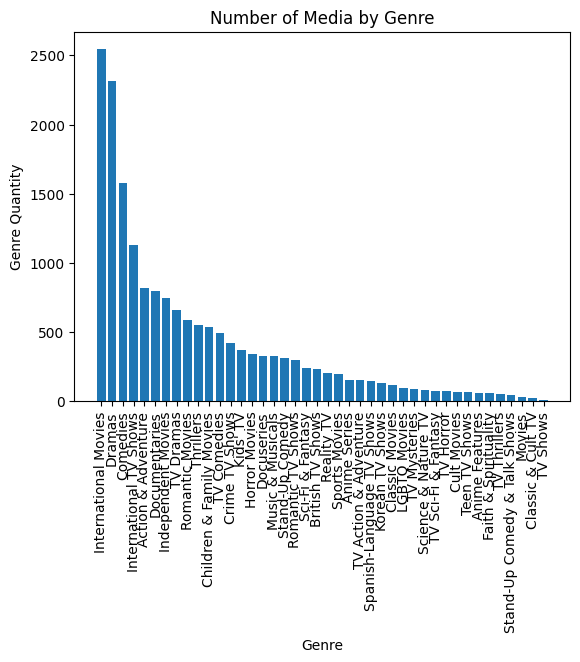

In [14]:
genre_count = netflix_df['listed_in'].value_counts()
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Quantity')
plt.title('Number of Media by Genre')
plt.show()

This chart shows what each peice of media is listed under on netflix. This graph shows that international movies are the most common, whilst TV shows are the least common.

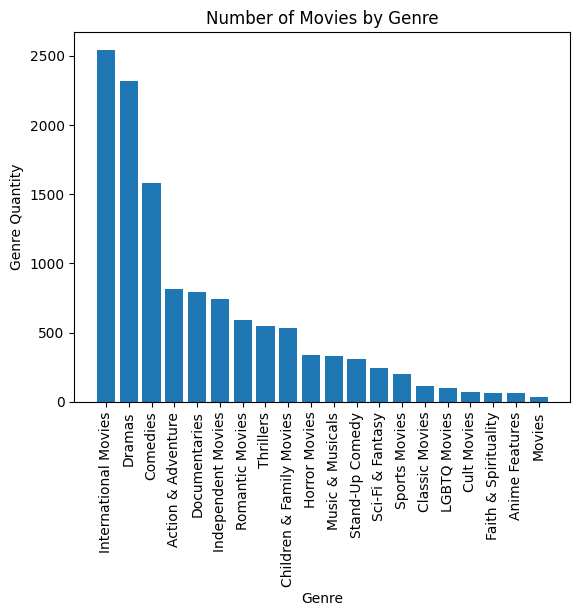

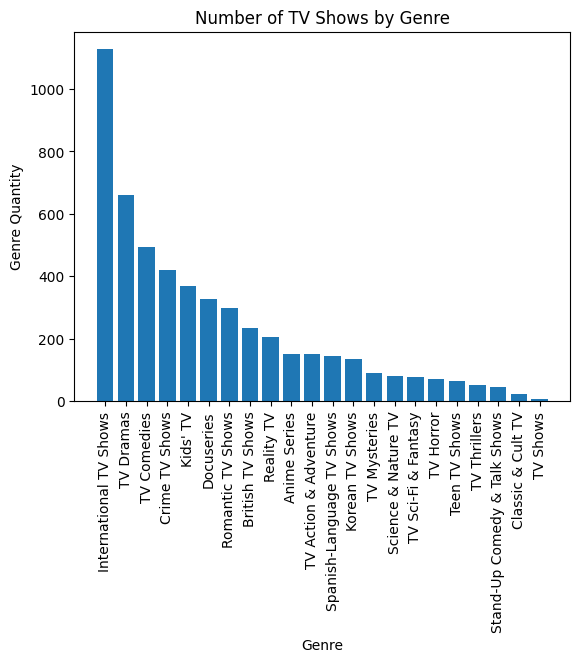

In [15]:
# Gets number of genres for only Movies
genre_count = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts()
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Quantity')
plt.title('Number of Movies by Genre')
plt.show()


# Gets number of genres for only TV shows
genre_count = netflix_df[netflix_df['type'] == 'TV Show']['listed_in'].value_counts()
plt.bar(genre_count.index, genre_count.values)

plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Genre Quantity')
plt.title('Number of TV Shows by Genre')
plt.show()

These graphs split the previous results up into movies and TV shows. This data shows that the top 3 genres remain the same, just with different names to distinguish TV from movies. Most genres outside of the top 3 mst common are different from each other, with documentaries being the fourth most common movie genre whilst crime is the fourth most common TV genre.

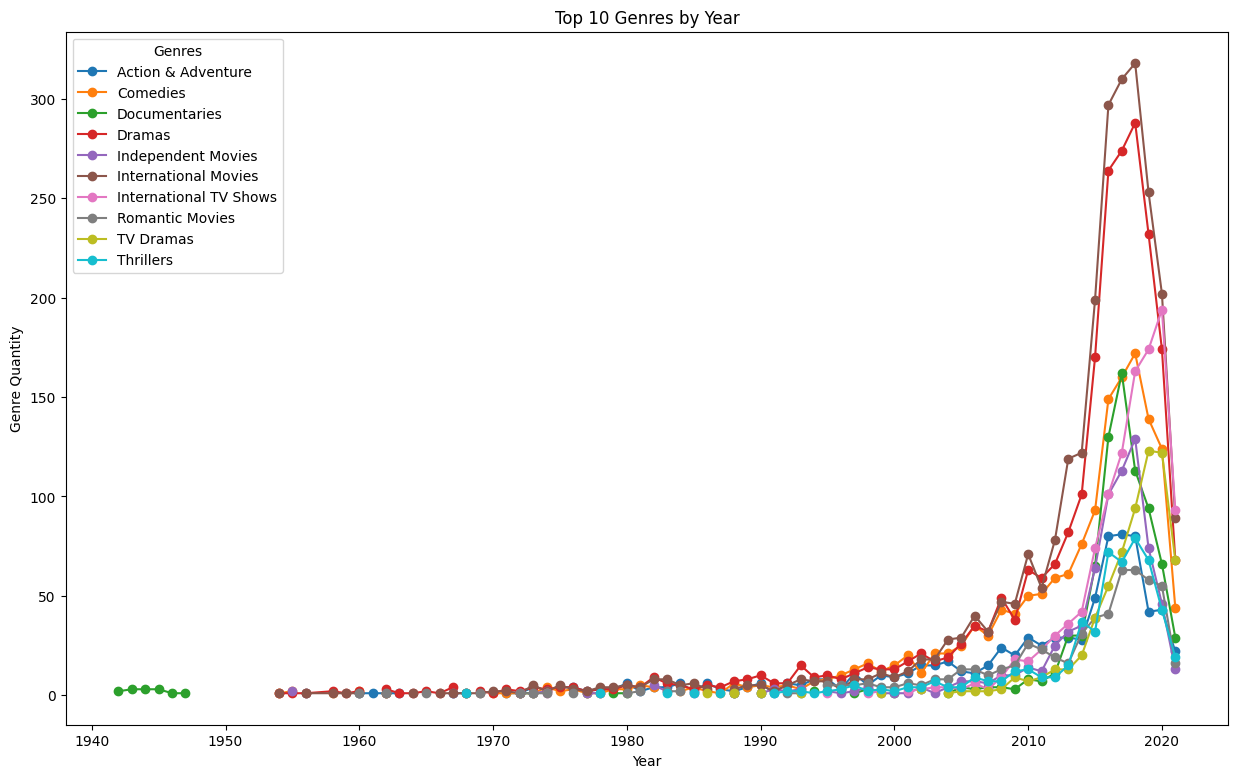

In [16]:
top_genres = netflix_df['listed_in'].value_counts().head(10).index.tolist() # Gets a list of the top 10 genres
df = netflix_df[netflix_df['listed_in'].isin(top_genres)] # Removes any genres that are not in the top 10 most common

df = df.groupby(['release_year', 'listed_in']).size().unstack() # Groups the data

df.plot.line(marker='o', figsize=(15,9)) # Gives the graph a larger size to make it easier to see
plt.xlabel('Year')
plt.ylabel('Genre Quantity')
plt.title('Top 10 Genres by Year')
plt.legend(title='Genres')
plt.show()

This graph shows the top 10 most popular genres in total and how their popularity changes with each year. This shows that internation has always remained near the top, but only started to become the most common after the year 2000, only being overtaken recently although it was by its TV show counterpart genre.

# Understanding the Reviews Dataset

In [17]:
reviews_df.info()
reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         236 non-null    object
 1   developers    205 non-null    object
 2   publishers    232 non-null    object
 3   release_date  221 non-null    object
 4   platforms     234 non-null    object
 5   genres        235 non-null    object
 6   score         236 non-null    int64 
 7   reviewed_by   236 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.9+ KB


,title,developers,publishers,release_date,platforms,genres,score,reviewed_by
0,Mass Effect Legendary Edition Part 3: Mass Ef...,BioWare,Electronic Arts,2021-05-14,"Xbox One, PlayStation 4, PC","Compilation, RPG",8,Dan Stapleton
1,Call of Duty: Vanguard - Single-Player Campaign,"Treyarch, Sledgehammer Games",Activision,2021-11-05,"Xbox Series X|S, Xbox One, PlayStation 5, P...","Shooter, First-Person",7,Simon Cardy
2,Shin Megami Tensei V,Atlus,Atlus,2021-11-12,Nintendo Switch,RPG,8,Leana Hafer
3,Forza Horizon 5,Playground Games,Xbox Game Studios,2021-11-09,"PC, Xbox Series X|S, Xbox One",Racing,10,Luke Reilly
4,Riders Republic,Ubisoft Annecy,Ubisoft,2021-10-28,"Stadia, PlayStation 5, PlayStation 4, Xbox ...","Sports, Extreme Sports",8,Travis Northup


The reviews dataset is smaller than the others, consisting of 8 columns and 236 rows of data. Most of the columsn appear to have a suitable data type except for the release data which is not a datetime type.

# Cleaning the Reviews Dataset

In [18]:
reviews_df['release_date'] = pd.to_datetime(reviews_df['release_date'], errors='coerce') # Changes the format of the publication_date column to datetime
reviews_df['release_date'] = reviews_df['release_date'].dt.date
reviews_df.dropna(subset=['title', 'platforms', 'genres', 'score', 'release_date'], inplace=True) # Removes any rows where these columns are empty
reviews_df.drop_duplicates(inplace=True) # Drops any duplicate rows

reviews_df = reviews_df.assign(platforms=reviews_df.platforms.str.split(", ")).explode('platforms') # splits the platforms so they are seperate
reviews_df['platforms'] = reviews_df['platforms'].str.strip() # Removes any spaces before a platform's name

reviews_df = reviews_df.assign(genres=reviews_df.genres.str.split(", ")).explode('genres') # splits the platforms so they are seperate
reviews_df['genres'] = reviews_df['genres'].str.strip() # Removes any spaces before a platform's name

reviews_df = reviews_df[reviews_df['platforms'] != 'TBA'] # Removes platforms named "TBA"

# Enhancing the Reviews Dataset

In [19]:
# Calculate the first quartile (Q1)
Q1 = reviews_df[["score"]].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = reviews_df[["score"]].quantile(0.75)
# Calculate the interquartile range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1
# Calculate the cutoff value by multiplying the IQR by 1.5
cutoff = 1.5 * IQR
# Calculate the lower and upper bounds for outliers
lower, upper = Q1 - cutoff, Q3 + cutoff
# Filter out the outliers directly without creating an intermediate column
# Keep rows within the acceptable range (i.e., not outliers)
reviews_df = reviews_df[(reviews_df["score"] >= lower["score"]) & (reviews_df["score"] <= upper["score"])]

# Analysing and Visualising the Reviews Dataset

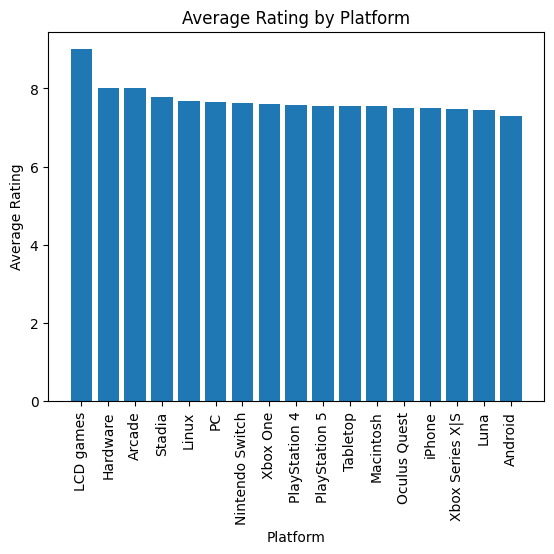

In [20]:
df = reviews_df.groupby('platforms')['score'].mean().reset_index() # Groups the platform with the score
df = df.sort_values('score', ascending=False)

plt.bar(df['platforms'], df['score'])
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.title('Average Rating by Platform')
plt.show()

This graph shows the average rating for games on each platform. Games on LCD has the highest rating whereas games on the TV game system has the lowest.

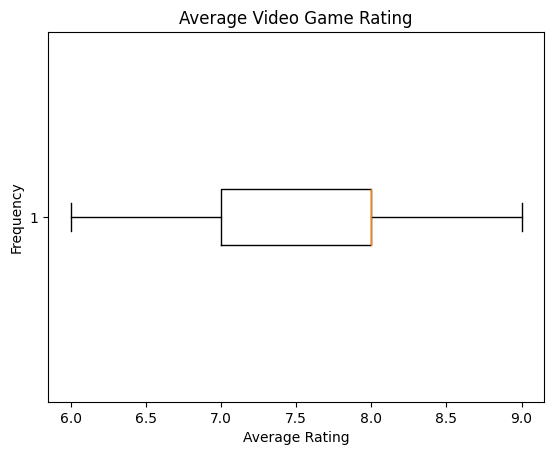

In [21]:
plt.boxplot(reviews_df['score'], vert=False) # Creates a boxplot with the average rating

plt.title('Average Video Game Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

This boxplot shows that the middle range of score values are between 7 and 8 with the median being 8. The minimum value is 6 while the maximum value is 9.

# Understanding the Video Games Dataset

In [22]:
games_df.info()
games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The video games dataset consists of 16 columns and 16719 rows. Most of the data types are suitable for the data they represent except column which will need to be changed to be float.

# Cleaning the Video Games Dataset

In [23]:
games_df['User_Score'] = pd.to_numeric(games_df['User_Score'], errors='coerce') # Changes the "user_score" column to an int. All errors will be set to NaN and removed with the next line of code

games_df.dropna(subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'User_Score'], inplace=True) # Removes all invalid rows in these columns


games_df['Average_Score'] = (games_df['Critic_Score'] + (games_df['User_Score']) * 10) / 2 # Creates a column containing the average score between user score and critic score

# Enhancing the Video Games Dataset

In [24]:
# Calculate the first quartile (Q1)
Q1 = games_df[["Average_Score"]].quantile(0.25)
# Calculate the third quartile (Q3)
Q3 = games_df[["Average_Score"]].quantile(0.75)
# Calculate the interquartile range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1
# Calculate the cutoff value by multiplying the IQR by 1.5
cutoff = 1.5 * IQR
# Calculate the lower and upper bounds for outliers
lower, upper = Q1 - cutoff, Q3 + cutoff
# Filter out the outliers directly without creating an intermediate column
# Keep rows within the acceptable range (i.e., not outliers)
games_df = games_df[(games_df["Average_Score"] >= lower["Average_Score"]) & (games_df["Average_Score"] <= upper["Average_Score"])
]

# Analysing and Visualising the Video Games Dataset

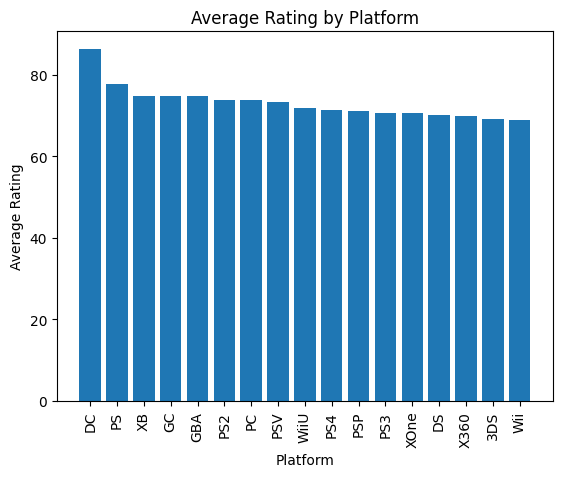

In [25]:
df = games_df.groupby('Platform')['Average_Score'].mean().reset_index() # Groups the average score and platform
df = df.sort_values('Average_Score', ascending=False) # Sorts the dataset into descending order

# Plot the bar chart
plt.bar(df['Platform'], df['Average_Score'])
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.title('Average Rating by Platform')
plt.show()

This graph shows the average rating per platform. THis is done by combinging the user and critic ratings to create an overall average. This graph shows that the DreamCast had the highest average rated games, whereas the Wii had the lowest average rating.

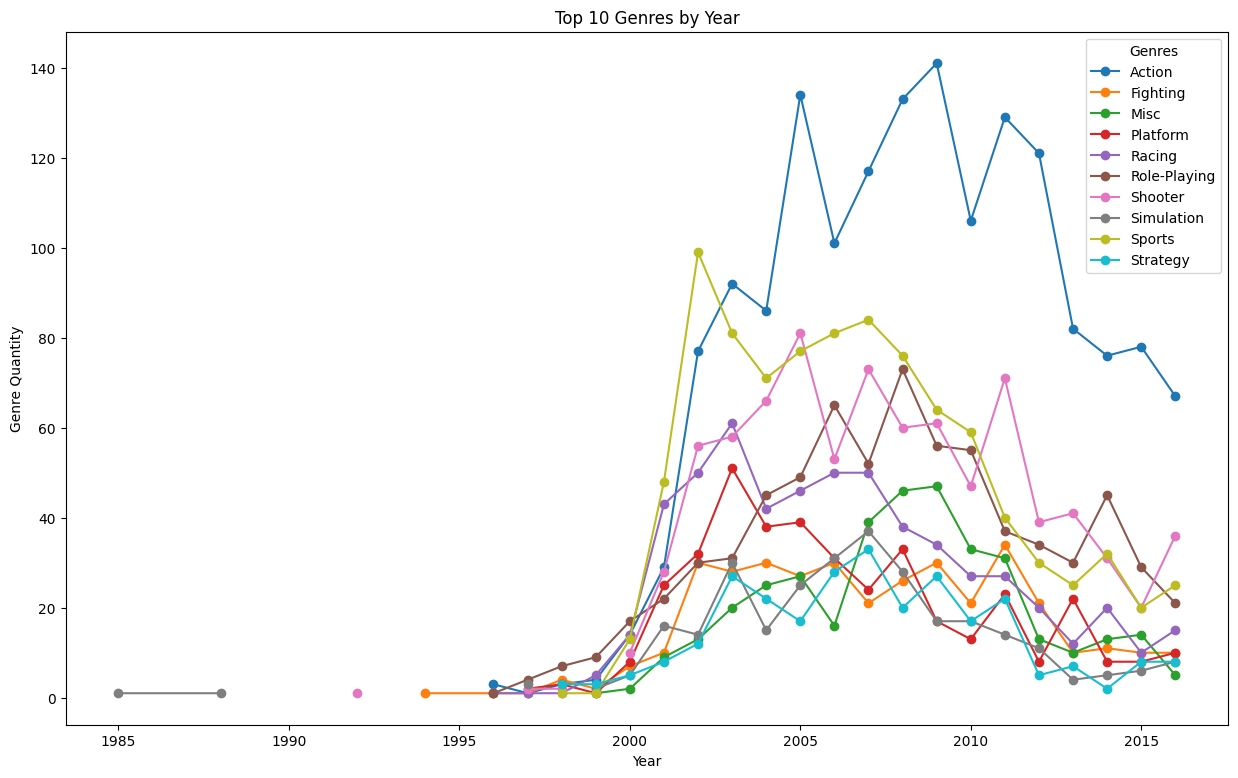

In [26]:
top_genres = games_df['Genre'].value_counts().head(10).index.tolist() # Gets a list of the top 10 genres
df = games_df[games_df['Genre'].isin(top_genres)] # Removes any genres that are not in the top 10 most common

df = df.groupby(['Year_of_Release', 'Genre']).size().unstack() # Groups the data

df.plot.line(marker='o', figsize=(15,9)) # Gives the graph a larger size to make it easier to see
plt.xlabel('Year')
plt.ylabel('Genre Quantity')
plt.title('Top 10 Genres by Year')
plt.legend(title='Genres')
plt.show()

This graph shows the amount of games being produced for each genre. Looking at the sports genre shows that it began with very low production rates until the 2000s where it gained popularity and became the most produced game for a short time, but has since began to slowly drop, falling behind other genres since then.

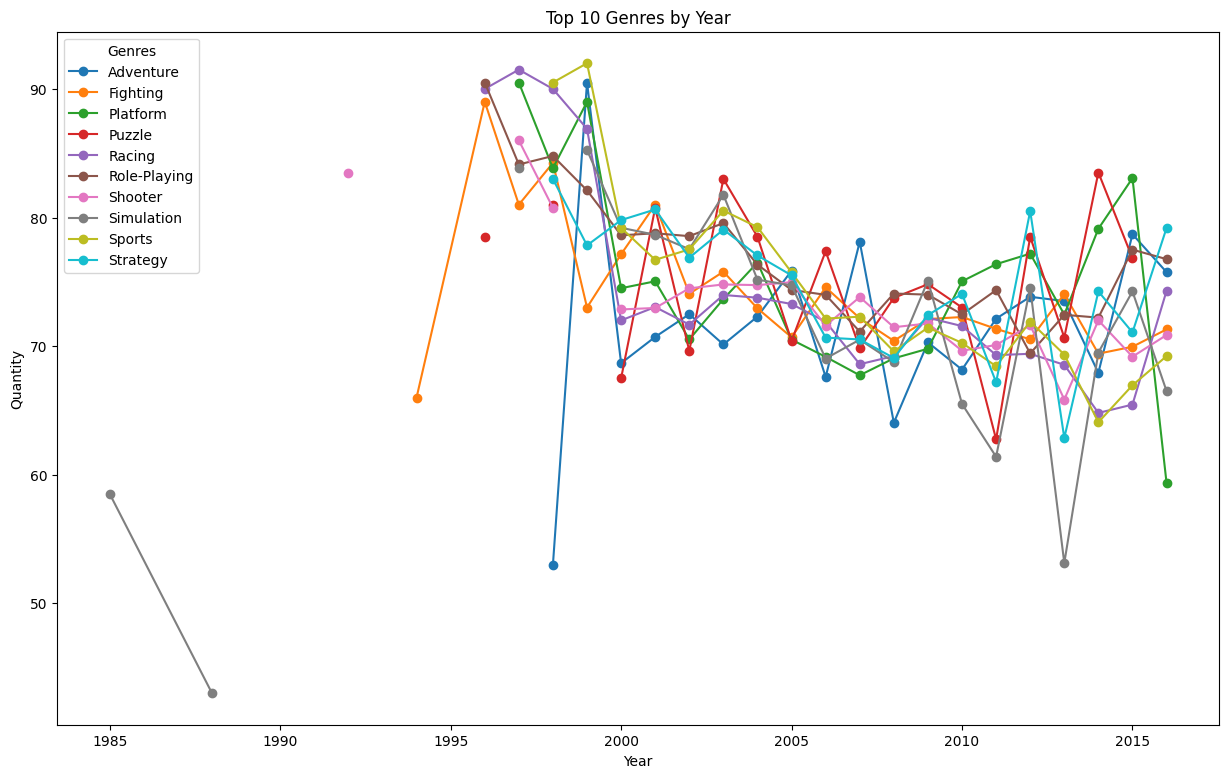

In [27]:
top_genres = games_df.groupby('Genre')['Average_Score'].mean().sort_values(ascending=False).head(10).index.tolist()
df = games_df[games_df['Genre'].isin(top_genres)] # Filter the DataFrame to include only the top 10 genres

df = df.groupby(['Year_of_Release', 'Genre'])['Average_Score'].mean().unstack() # Groups the data

df.plot.line(marker='o', figsize=(15,9)) # Gives the graph a larger size to make it easier to see
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Top 10 Genres by Year')
plt.legend(title='Genres')
plt.show()

This shows the top 10 genres by score. Looking at the sports genre again shows that it started off with high ratings but quickly dropped and has been slowly declining until after 2015 where it started to rise again.

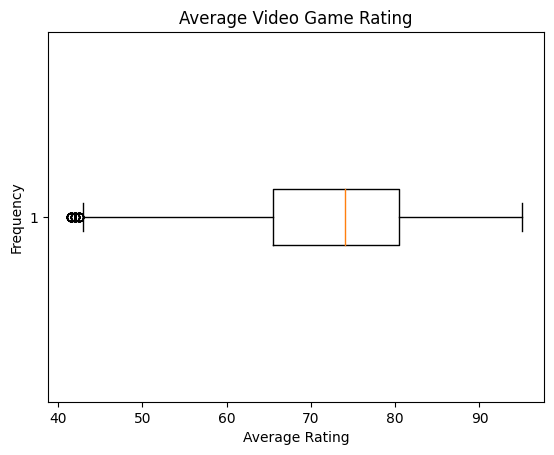

In [28]:
plt.boxplot(games_df['Average_Score'], vert=False) # Creates a boxplot with the average rating

plt.title('Average Video Game Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

This boxplot shows the middle range of scores being between 65 to slightly over 80. It also shows the max value being over 90 and the min value being just below 45 with some outliers below the min.

# Evaluation

Evaluating the dataset shows that the most popular books are the most likely to be successful and are therefore most likely the ones people are most likely to buy due to their higher ratings. The second graph shows that books are recently being rated less frequently, which could mean that fewer copies are being sold and read. This means that being an author or publisher will be less profitable now than compared to 10 years ago.

The hotstar dataset graphs all show that the drama genre is most commonly produced. This could mean that it is the most popular, however, this could also mean that it is the most oversaturated genre making it harder for newer producers to get into. Looking at the last graph shows that all genres most commonly produced genre have very recently had a sharp drop in production rate, except for family, action, and comedy genres which have been increasing instead. Looking at the history of the action and comedy genres reveals that they have had drops in production rate in the past, whereas family has always been steadily increasing making it safer to get into.

In the Netflix dataset, drama movies are by far the most commonly made genre, ignoring international as it is not technically a genre. Although they are the most common, they are currently dropping significantly, along with all other genres and as a result, their position is much closer to the other genres, meaning their position on the chart could potentially change in the upcoming years. Since all genres are currently dropping production rates, finding a good genre that is likely to continue to do well is difficult. This also corroborates the hotstar dataset, where dramas had a significant lead until very recently where they began to sharply drop. One genre that is different between these two is the romance genre, which has begun to quickly rise on the Netflix dataset, whereas on the hotstar dataset it kept fluctuating had had recently sharply dropped.

The reviews dataset shows that games for the LCD are the most likely to be highly rated. Comparing the platform popularity between this dataset and the games dataset reveals some inconsistencies. In the reviews dataset, the Xbox One is ranked higher than the PlayStation4, whereas, in the video games dataset, it is the other way around. However, since the consoles are very similar in rating, the difference is likely due to a margin of error.

The games dataframe reveals that action is one of the most commonly produced games, however looking at the most popular games reveals that action is more mediocre in terms of popularity. This trend is also shared by the sports genre, which has lots of games produced for it whilst having mixed reception. This shows that there is not much correlation between the number of games produced in a genre and the popularity of the genre. Comparing the average rating box plot to the same type of boxplot made for the reviews dataset reveals some differences. The upper quartile on the video games dataframe is much higher, while the lower quartile is lower. In addition to this, there are outliers in the average rating for the video games dataset beneath the min, unlike in the reviews dataset which has no outliers.
